# Funzioni

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def fit_predict_print(train, test, target_columns, estimator):
  X_tr = train.drop(columns=target_columns)
  y_tr = train[target_columns]
  X_ts = test.drop(columns=target_columns)
  y_ts = test[target_columns]

  return fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, estimator)


def fit_predict_print_1(X_train, X_test, y_train, y_test, estimator):
  y_pred = estimator.fit(X_train, y_train).predict(X_test)
  print_accuracy(y_test, y_true, display_labels=estimator.classes_)
  return y_pred

def print_accuracy(y_test, y_pred, display_labels=None):
  print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
  cm = metrics.confusion_matrix(y_test, y_pred)
  print('Confusion matrix:\n', cm)
  cmn = metrics.confusion_matrix(y_test, y_pred, normalize='true')
  ConfusionMatrixDisplay(cmn, display_labels=display_labels).plot()

In [ ]:
def balanced_subsample(X, y, subsample_size=1.0):

    classes = y.unique()
    min_elems = y.value_counts().min()

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems * subsample_size)

    Xb = pd.DataFrame()
    yb = pd.Series()

    for c in classes:
      X_ = X[y == c]
      if X_.shape[0] > use_elems:
        X_ = X_.sample(use_elems)

      yc = np.empty(use_elems)
      yc.fill(c)
      y_ = pd.Series(yc)

      Xb = pd.concat([Xb, X_])
      yb = pd.concat([yb, y_])

    return Xb, yb

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(dataset, columns, drop=None):

  categories = []
  ret_columns = []

  if isinstance(columns, str):
    columns = [columns]
  if (drop is not None) and (isinstance(drop, str)):
    drop = [drop]

  for i in range(0, len(columns)):
    ctg = dataset.loc[:, columns[i]].unique().tolist()
    categories.append(ctg)

    ctg_ = ctg.copy();
    if drop is not None:
      ctg_.remove(drop[i])
    ret_columns += ctg_

  encoder = OneHotEncoder(categories=categories, drop=drop).fit(dataset[columns])
  ds = pd.DataFrame(encoder.transform(dataset[columns]).toarray(), columns=ret_columns)

  return ds


def add_dummies(dataset, columns, drop_cat=None, drop_col=True):
  dummies = one_hot_encode(dataset, columns, drop_cat)
  if drop_col:
    ret = pd.concat([dataset.drop(columns=columns), dummies], axis=1)
  else:
    ret = pd.concat([dataset, dummies], axis=1)
  return ret

In [ ]:
def xtab(rows_data, cols_data, normalize_rows=False):
  xtab = pd.crosstab(rows_data, cols_data)
  if normalize_rows:
    for i in xtab.index:
      xtab.loc[i] = xtab.loc[i] / (rows_data == i).sum()
    _ = sns.heatmap(xtab, vmin=0, vmax=1)
  else:
    _ = sns.heatmap(xtab)
  print(xtab)
  return xtab

# Parte 1: Analisi

### 1

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA/data/training_set.csv')

In [ ]:
dataset.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [ ]:
dataset.SOURCE.value_counts()

0    1992
1    1317
Name: SOURCE, dtype: int64

In [ ]:
dataset.AGE.value_counts()

25    67
67    66
62    65
45    63
33    60
      ..
90     5
85     4
93     1
98     1
99     1
Name: AGE, Length: 95, dtype: int64

### 2, 3

In [ ]:
dataset['age_bins'] = pd.cut(dataset.AGE, 10)

SOURCE                0         1
age_bins                         
(0.902, 10.8]  0.666667  0.333333
(10.8, 20.6]   0.630000  0.370000
(20.6, 30.4]   0.680894  0.319106
(30.4, 40.2]   0.685649  0.314351
(40.2, 50.0]   0.593258  0.406742
(50.0, 59.8]   0.546460  0.453540
(59.8, 69.6]   0.549719  0.450281
(69.6, 79.4]   0.565934  0.434066
(79.4, 89.2]   0.500000  0.500000
(89.2, 99.0]   0.296296  0.703704


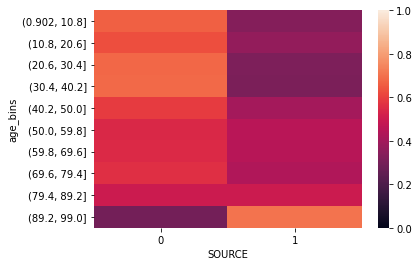

In [ ]:
_ = xtab(dataset.age_bins, dataset.SOURCE, normalize_rows=True)

SOURCE         0         1
SEX                       
F       0.631545  0.368455
M       0.575445  0.424555


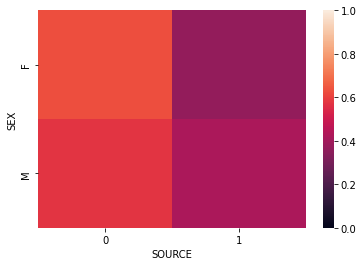

In [ ]:
_ = xtab(dataset.SEX, dataset.SOURCE, normalize_rows=True)

4

In [ ]:
pd.pivot_table(dataset, values='SOURCE', index='age_bins', columns='SEX')

SEX,F,M
age_bins,,
"(0.902, 10.8]",0.427083,0.247619
"(10.8, 20.6]",0.282609,0.444444
"(20.6, 30.4]",0.275304,0.363265
"(30.4, 40.2]",0.333333,0.293839
"(40.2, 50.0]",0.406699,0.406780
"(50.0, 59.8]",0.435233,0.467181
"(59.8, 69.6]",0.380165,0.508591
"(69.6, 79.4]",0.352941,0.492891
"(79.4, 89.2]",0.421687,0.589041


# Parte 2: Trasformazione e Predizione

### 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [ ]:
dataset.drop(columns='age_bins', inplace=True)

In [ ]:
sex = {
    'F': 0,
    'M': 1,
}

replace = {
    'SEX': sex,
}

In [ ]:
dataset.replace(replace, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   int64  
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 284.5 KB


In [ ]:
X = dataset.drop(columns='SOURCE')
y = dataset.SOURCE

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, train_size=2/3, random_state=1)

Accuracy: 1.0
Confusion matrix:
 [[1318    0]
 [   0  888]]


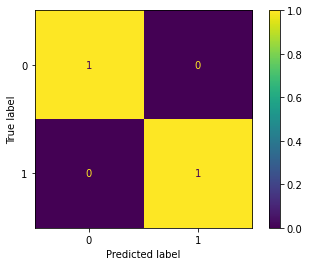

In [ ]:
_ = fit_predict_print_1(X_tr, X_tr, y_tr, y_tr, DecisionTreeClassifier())

Accuracy: 0.6736174070716229
Confusion matrix:
 [[490 184]
 [176 253]]


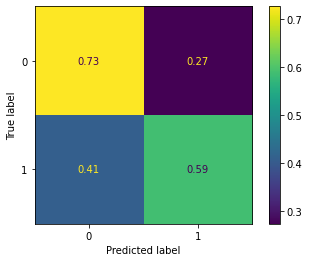

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, DecisionTreeClassifier())

Accuracy: 0.71350861287398
Confusion matrix:
 [[1143  175]
 [ 457  431]]


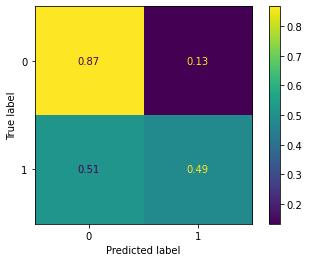

In [ ]:
_ = fit_predict_print_1(X_tr, X_tr, y_tr, y_tr, LogisticRegression(n_jobs=-1))

Accuracy: 0.728921124206709
Confusion matrix:
 [[594  80]
 [219 210]]


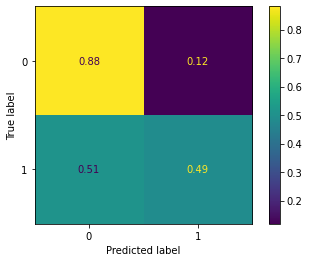

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, LogisticRegression(n_jobs=-1))

Accuracy: 0.5974614687216682
Confusion matrix:
 [[1318    0]
 [ 888    0]]


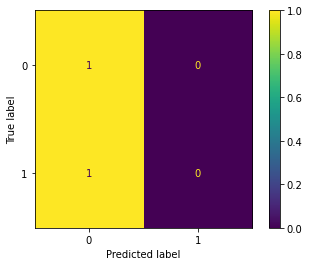

In [ ]:
_ = fit_predict_print_1(X_tr, X_tr, y_tr, y_tr, DummyClassifier())

Accuracy: 0.6110607434270172
Confusion matrix:
 [[674   0]
 [429   0]]


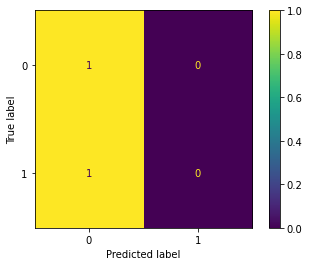

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, DummyClassifier())

### 2

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy', 
                n_jobs=-1).mean()

0.6582065366657511

In [ ]:
cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy', 
                n_jobs=-1).mean()

0.7138066465256798

In [ ]:
cross_val_score(DummyClassifier(), X, y, cv=10, scoring='accuracy', 
                n_jobs=-1).mean()

0.6019948732033324

### 3

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4, 5]
}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy',
                  n_jobs=-1, cv=10).fit(X, y)

In [ ]:
gs.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 3}

In [ ]:
gs.best_score_ # in linea con l'accuratezza ottenuta in precedenza

0.6790487961182825

### 5

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, MaxAbsScaler
from sklearn.pipeline import Pipeline

In [ ]:
booleans = []
for c in X.columns:
  if (X[c].min() == 0) & (X[c].max() == 1) & (X[c].value_counts().size == 2):
    booleans.append(c)
booleans

['SEX']

In [ ]:
to_discr = ['AGE', 'THROMBOCYTE']
to_scale = X.columns.drop(to_discr, booleans)

In [ ]:
ct = ColumnTransformer([
    ('discr', KBinsDiscretizer(10), to_discr),
], remainder='passthrough')

In [ ]:
pre_proc = Pipeline([
    ('discr', ct), 
    ('scale', MaxAbsScaler()),
])

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, train_size=2/3, random_state=1)

Accuracy: 0.6391659111514053
Confusion matrix:
 [[465 209]
 [189 240]]


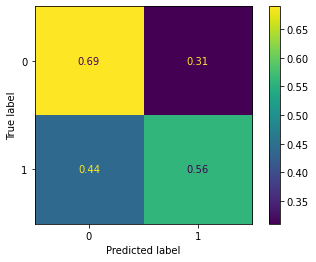

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_features='auto', 
                             min_samples_split=4)
pipeline = Pipeline([
    ('pre_proc', pre_proc),
    ('model', clf)
])

_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, pipeline)

Accuracy: 0.7180417044424298
Confusion matrix:
 [[581  93]
 [218 211]]


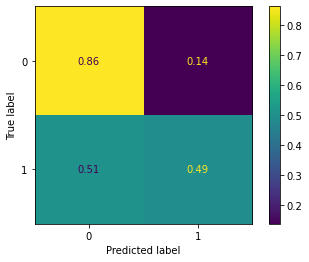

In [ ]:
clf = LogisticRegression(n_jobs=-1)

pipeline = Pipeline([
    ('pre_proc', pre_proc),
    ('model', clf)
])

_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, pipeline)

### 5

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
ct = ColumnTransformer([
    ('discr_age', KBinsDiscretizer(4), ['AGE']),
    ('discr_thr', KBinsDiscretizer(10), ['THROMBOCYTE']),
], remainder='passthrough')

In [ ]:
pre_proc = Pipeline([
    ('discr', ct), 
    ('scale', MaxAbsScaler()),
    ('normz', Normalizer())
])

Accuracy: 0.6826835902085222
Confusion matrix:
 [[505 169]
 [181 248]]


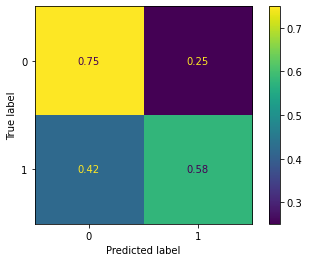

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_features='auto', 
                             min_samples_split=4)
pipeline = Pipeline([
    ('pre_proc', pre_proc),
    ('model', clf)
])

_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, pipeline)

### 6

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
clf = LinearRegression(n_jobs=-1)

pipeline = Pipeline([
    ('pre_proc', pre_proc),
    ('model', clf)
]).fit(X_tr, y_tr)

In [ ]:
pred = pipeline.predict(X_ts)
y_pr = np.round(np.clip(pred, 0, 1))

In [ ]:
pd.Series(y_pr).value_counts()

0.0    789
1.0    314
dtype: int64

Accuracy: 0.7325475974614687
Confusion matrix:
 [[584  90]
 [205 224]]


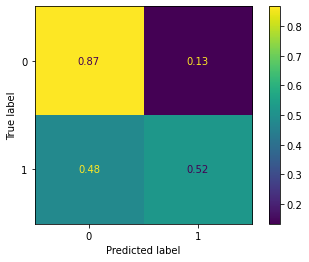

In [ ]:
print_accuracy(y_ts, y_pr)